# It's the quantization version for v5

In [16]:
from IPython.display import Image
from os import chdir
import numpy as np
import tables as tb
import gudhi as gd
import matplotlib.pyplot as plt
import matplotlib
import time

In [17]:
# read the file
file_name = "function_rips_with_threshold_100_1"
#file_name="fig3-2"
rank_dim = 0
#grid_size=10

simplices = []
vertice_id = 0
i = 0

x_values = []
y_values = []

for line in open("../cgta_paper_2021/function_rips/"+file_name+".scc"):
#for line in open("./data/"+file_name+".txt"):
    if(line[0]!='#'):
        
        if(i<=1):
            i=i+1
            continue
            
        elif(i==2):
            rank_num=[] # sizes of generating sets
            for j in line.split():
                rank_num.append(int(j))
            i=i+1
            rank_num=rank_num[:-1]
            print("rank_num=",rank_num)
        else:
            block = line.split(';')
            grid = block[0].split()
            grid_x = float(grid[0])
            grid_y = float(grid[1])
            #grid_x = int(float(grid[0])*20)
            #grid_y = int(float(grid[1])*20)
            x_values.append(grid_x)
            y_values.append(grid_y)
            
            
            if len(block)>1:
                face = block[1].split()
                for j in range(len(face)):
                    face[j] = int(face[j])
                simplices.append([grid_x,grid_y,face])
                
            else:
                simplices.append([grid_x,grid_y,[vertice_id]])
                vertice_id += 1
            i=i+1   




simplex_tree = []
start_id=0
for i in range(len(rank_num)-1,-1,-1):
    simplices_i=[]
    for j in range(len(simplices)-start_id-rank_num[i],len(simplices)-start_id):
        simplices_i.append(simplices[j])
    start_id += rank_num[i]
    simplex_tree.append(simplices_i)
    


#transform face number to vertex number
for i in range(1,len(simplex_tree)):
    for j in range(len(simplex_tree[i])):
        simplex = simplex_tree[i][j]
        face = simplex[2]
        vertices=[]
        for face_id in face:
            vert = simplex_tree[i-1][face_id][2]
            for vert_id in vert:
                if vert_id not in vertices:
                    vertices.append(vert_id)
        simplex_tree[i][j][2]=vertices



## To verify the data structur
## simplices contain all the information we need
#print("the simplex tree:")
for i in range(len(simplex_tree)):
    for simplex in simplex_tree[i]:
        print(simplex)   

#print("len(simplex_tree)=",len(simplex_tree))
#for i in range(len(simplex_tree)):
#    print("length of simplex_tree",i,len(simplex_tree[i]))
#       


rank_num= [5, 10, 10, 5]
[0.0, -23.87324146378428, [0]]
[0.0, -23.87324146378428, [1]]
[0.0, -23.87324146378428, [2]]
[0.0, -23.87324146378428, [3]]
[0.0, -23.87324146378428, [4]]
[0.5011382653047594, -23.87324146378428, [4, 3]]
[0.7480490262529788, -23.87324146378428, [2, 1]]
[1.0901441034205996, -23.87324146378428, [2, 0]]
[1.1503998364786394, -23.87324146378428, [1, 0]]
[1.4168816258349657, -23.87324146378428, [4, 1]]
[1.572507047717775, -23.87324146378428, [4, 0]]
[1.602540165816185, -23.87324146378428, [3, 0]]
[1.7203143022224023, -23.87324146378428, [3, 1]]
[1.8419929814491458, -23.87324146378428, [4, 2]]
[1.9753468692247196, -23.87324146378428, [3, 2]]
[1.1503998364786394, -23.87324146378428, [2, 1, 0]]
[1.572507047717775, -23.87324146378428, [4, 1, 0]]
[1.602540165816185, -23.87324146378428, [4, 3, 0]]
[1.7203143022224023, -23.87324146378428, [3, 1, 0]]
[1.7203143022224023, -23.87324146378428, [4, 3, 1]]
[1.8419929814491458, -23.87324146378428, [4, 2, 0]]
[1.8419929814491458, -

start_order=time.time()
x_values_ordered = sorted(list({}.fromkeys(x_values).keys()))
end_order=time.time()
print("sorting x time",end_order-start_order)
y_values_ordered = sorted(list({}.fromkeys(y_values).keys()))
end2_order=time.time()
print("sorting y time",end2_order-start_order)

simplex_tree_integer=simplex_tree


for i in range(len(simplex_tree_integer)):
    for j in range(len(simplex_tree_integer[i])):
        #print("[i,j]",[i,j])
        simplex_tree_integer[i][j][0]=x_values_ordered.index(simplex_tree[i][j][0])
        simplex_tree_integer[i][j][1]=y_values_ordered.index(simplex_tree[i][j][1])
        #print("time of change value",end_change-start_change)

end_sti=time.time()
print("change value",end_sti-end2_order)


In [18]:

x_min=min(x_values)
y_min=min(y_values)
x_length = float(max(x_values)-x_min)
y_length = float(max(y_values)-y_min)


#if(x_length!=0 and y_length!=0):
#    end_point = [grid_size,round(y_length/x_length*grid_size+1)]

print("x_length",x_length)
print("y_length",y_length)




x_length 1.9753468692247196
y_length 0.0


In [19]:

x_range = 10
y_range = 10

end_point=[x_range,y_range]
print("end_point ",end_point)

x_interval = x_length/x_range
y_interval = y_length/y_range

simplex_tree_integer=simplex_tree

for i in range(len(simplex_tree_integer)):
    for j in range(len(simplex_tree_integer[i])):
        #print("[i,j]",[i,j])
        if(x_interval==0):
            simplex_tree_integer[i][j][0]=0
        else:
            simplex_tree_integer[i][j][0] = round((simplex_tree[i][j][0]-x_min)/x_interval)
            
        if(y_interval==0):
            simplex_tree_integer[i][j][1]=0
        else:
            simplex_tree_integer[i][j][1] = round((simplex_tree[i][j][1]-y_min)/y_interval)
        #print("time of change value",end_change-start_change)
        
for i in range(len(simplex_tree_integer)):
    for simplex in simplex_tree_integer[i]:
        print(simplex)

end_point  [10, 10]
[0, 0, [0]]
[0, 0, [1]]
[0, 0, [2]]
[0, 0, [3]]
[0, 0, [4]]
[3, 0, [4, 3]]
[4, 0, [2, 1]]
[6, 0, [2, 0]]
[6, 0, [1, 0]]
[7, 0, [4, 1]]
[8, 0, [4, 0]]
[8, 0, [3, 0]]
[9, 0, [3, 1]]
[9, 0, [4, 2]]
[10, 0, [3, 2]]
[6, 0, [2, 1, 0]]
[8, 0, [4, 1, 0]]
[8, 0, [4, 3, 0]]
[9, 0, [3, 1, 0]]
[9, 0, [4, 3, 1]]
[9, 0, [4, 2, 0]]
[9, 0, [4, 2, 1]]
[10, 0, [3, 2, 0]]
[10, 0, [3, 2, 1]]
[10, 0, [4, 3, 2]]
[9, 0, [4, 3, 1, 0]]
[9, 0, [4, 2, 1, 0]]
[10, 0, [3, 2, 1, 0]]
[10, 0, [4, 3, 2, 0]]
[10, 0, [4, 3, 2, 1]]


## Compute rank invariant

In [20]:
def create_stair(elbow, end_point):
    # stair a path passing through the elbow.
    stair = []
    
    if(elbow[0]==0 or elbow[1]==end_point[1]):
        for i in range(end_point[1]+1):
            stair.append([0,i])
        for j in range(1,end_point[0]+1):
            stair.append([j,i])
    else:
        for i in range(elbow[1]+1):
            stair.append([0,i])   # i=0
        for j in range(elbow[0]):
            stair.append([j+1,i]) # j=0
        for k in range(i+1, end_point[1]+1):
            stair.append([j+1,k]) # k=2,3
        for l in range(j+2, end_point[0]+1):
            stair.append([l,k])
    return stair

def compute_rk(i,j,k,l,barcodes,rank_dim):
# This function computes the value rank(s,t) where s=(i,j) and t = (k,l)
    if(i>k or j>l):
        return 0
    
    s_1 = i + j
    t_1 = k + l
    rank0_inv = 0
    rank1_inv = 0

    for barcode in barcodes:
        if(barcode[0]==0):
            if(barcode[1][0]<=s_1 and barcode[1][1]>t_1):
                rank0_inv = rank0_inv + 1
        elif(barcode[0]==1):
            if(barcode[1][0]<=s_1 and barcode[1][1]>t_1):
                rank1_inv = rank1_inv + 1
    if(rank_dim==0):
        return rank0_inv
    elif(rank_dim==1):
        return rank1_inv



In [21]:
def proj_grid_to_path(simplex, elbow, x_range, y_range):
    #simplex=[x,y,[face]]
    #elbow=[x,y]
    #print("========enter func=========")
    #if(elbow[0]==0 or elbow[1]==y_range):
    #    elbow=[0,y_range]
    x = simplex[0]
    y = simplex[1]
    x0 = elbow[0]
    y0 = elbow[1]
    

    if((x==0 and y<=y0) or (y==y0 and x<=x0) or (y>=y0 and x==x0) or (y==y_range and x>=x0)):
        proj_p=[x,y]
    elif(x<=x0 and y<=y0):
        proj_p= [x,y0]
    elif(x<=x0 and y>=y0):
        proj_p= [x0,y]
    else:
        proj_p= [x,y_range]
    return proj_p
    
# test

#print("simplex ",simplex_tree_integer[1][3])
#eb=[2,0]

#print("result ",proj_grid_to_path(simplex_tree_integer[1][3],eb,x_range,y_range))


def tensor2list_id(i,j,k,l,x_range,y_range): #TODO: debug
    # This function transform the coordinate (s,t) where s=(i,j) and t = (k,l) to id
    term1 = (2*x_range+3-i)*i*(y_range+2)*(y_range+1)/4
    term2 = (x_range+1-i)*(2*y_range+4-j)*(j-1)/2
    term3 = (y_range-j+1)*(k-i)+l-j
    return int((term1+term2+term3)/2) 

import tables as tb
fileName = "./result/rank"+str(rank_dim)+"_invariance_for_"+file_name+'.h5'
print(fileName)
shape = (x_range+1,y_range+1,x_range+1,y_range+1)
#shape = (int(x_range)+1,int(y_range/2)+1,int(x_range)+1,int(y_range/2)+1)

atom = tb.UInt8Atom()
filters = tb.Filters(complevel=9, complib='zlib')
h5f = tb.open_file(fileName, 'w')

rank_inv = h5f.create_carray(h5f.root, 'carray', atom, shape,filters=filters)
rank_inv = -np.array(np.ones((x_range+1,y_range+1,x_range+1,y_range+1)))

#rank_inv=-np.ones((x_range+1,y_range+1,x_range+1,y_range+1))
#re-open
#h5f = tb.open_file(fileName)
#print(h5f)
#print(h5f.root.carray[8:12, 18:22])
h5f.close()

In [26]:

#grid is from (0,0)
#vertex index is from 0

#ri_len=int(x_range*y_range*(x_range+1)*(y_range+1)/4) # if 1000000 simplices, ri_len = e11
#print("rank inv list len",ri_len)
#rank_inv = [0]*ri_len
rank_inv = np.array(np.zeros((x_range+1,y_range+1,x_range+1,y_range+1)))


st = gd.SimplexTree()
#result_rank_fn="./result/rank1_invariance_for_"+file_name+".txt"
#f_rank = f.open(result_rank_fn,"w")



#Scan all the elbows
for i in range(x_range+1):
    for j in range(y_range+1):
        elbow = [i,j]
        print("elbow",elbow)
        start_time=time.time()
        #print("time: start building a simplex tree",time.time())
        stair = create_stair(elbow, end_point)
        end_stair=time.time()
        print("time of creating a stair is ",end_stair-start_time,"s")
        print("stair",stair)

        # Build the simplex tree
        
        for ii in range(len(simplex_tree_integer)): #4
            for jj in range(len(simplex_tree_integer[ii])): #[37961, 36515, 20524, 5000]
                
                start_loop = time.time()
                simplex = simplex_tree_integer[ii][jj]
                #print("simplex",simplex)
                #print("elbow",elbow)
                start_grid_id=time.time()
                #####################
                #for grid_id in stair:
                #    if simplex[0]<=grid_id[0] and simplex[1]<=grid_id[1]:
                #        #print("proj_correct ",grid_id)
                #        filtration_value = grid_id[0]+grid_id[1] #TODO
                #        #print("filtration_value_correct",filtration_value)
                #        start_insert=time.time()
                #        #print("time enter insert/assign ", time.asctime( time.localtime(time.time())))
                #        if((st.insert(simplex[2], filtration = filtration_value))==False): #TODO:optimize with C++, we don't have the funciton for Python
                #            #print("time finish insert",time.asctime( time.localtime(time.time())))
                #            end_insert=time.time()
                #            st.assign_filtration(simplex[2], filtration = filtration_value)
                #            end_assign=time.time()
                #            #print("assign time",end_assign-end_insert,"s")
                #        else:
                #            end_insert=time.time()
                #        #print("insert time",end_insert-start_insert,"s")
                #        break
                ####################
                #filtration_value = proj_grid_to_path(simplex, elbow, x_range, y_range)
                proj_p = proj_grid_to_path(simplex, elbow, x_range, y_range)
                filtration_value=proj_p[0]+proj_p[1]
                #print("proj_p",proj_p)
                #print("====================")
                #print("filtration_value ",filtration_value)
                if((st.insert(simplex[2], filtration = filtration_value))==False):
                    st.assign_filtration(simplex[2], filtration = filtration_value)
                ####################
                
                end_loop = time.time()
                #print("time for loop of stair ",end_loop-start_grid_id,"s")
                #print("time for one loop of build a simplex tree",end_loop-start_loop,"s")
                # from 1.4e-05s(small simplex tree) to 0.0023s(large simplex tree)
                        
        st_time=time.time()                
        print("time of building a simplex tree",st_time-start_time,"s")
        #print("simplices ",st.num_simplices())
        #print("vertices ", st.num_vertices())
        #st_gen = st.get_filtration() 
        #for splx in st_gen :
        #    print(splx)
        
        #barcodes = st.persistence()
        
        #print("num barcodes",len(barcodes))
        print("barcodes,",barcodes)
        bc_time = time.time()
        print("time of calculating barcodes ",bc_time-st_time,"s")
        
        ################################ to be optimized
        #for start_id in range(len(stair)):
        #    for end_id in range(start_id,len(stair)):
        #        grid_start = stair[start_id]
        #        grid_end = stair[end_id]
        #        [ri,rj,rk,rl]=[grid_start[0],grid_start[1],grid_end[0],grid_end[1]]
        #        if(rank_inv[ri,rj,rk,rl]==-1):
        #            rank_inv[ri,rj,rk,rl]=compute_rk(ri,rj,rk,rl,barcodes,rank_dim)
        #        #compute_rk(ri,rj,rk,rl,barcodes,rank_dim)
        #################################
        rank_inv_tmp = np.zeros_like(rank_inv)
        
        for barcode in barcodes:
            if(barcode[0]==rank_dim):
                barcode_sid = int(barcode[1][0])
                barcode_eid = barcode[1][1]
                if(barcode_eid>x_range+y_range+2):
                    barcode_eid = x_range+y_range+1
                barcode_eid = int(barcode_eid)
                #print("stair",stair)
                #print("enter looooooooooooop:")
                bar_start_time=time.time()

                for r_s in range(barcode_sid,barcode_eid):#dubug for repeat sum
                    for r_e in range(r_s, barcode_eid):
                        #a=1
                        #rank_inv_id = tensor2list_id(stair[r_s][0],stair[r_s][1],stair[r_e][0],stair[r_e][1],x_range,y_range)
                        #print("rank_inv_id=",rank_inv_id)
                        #rank_inv[rank_inv_id]+=1
                        #print("stair point, end point",stair[r_s],stair[r_e])
                        
                        rank_inv_tmp[stair[r_s][0],stair[r_s][1],stair[r_e][0],stair[r_e][1]]+=1 
                bar_end_time=time.time()
                #print("time of each loop for barcode",bar_end_time-bar_start_time)
        rank_inv_tmp[rank_inv>0]=0
        
        rank_inv = rank_inv + rank_inv_tmp
        ri_time = time.time()
        print("time of calculating rank invariance",ri_time-bc_time,"s")
        print("total time for one elbow ",ri_time-start_time,"s")




elbow [0, 0]
time of creating a stair is  9.059906005859375e-06 s
stair [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [1, 10], [2, 10], [3, 10], [4, 10], [5, 10], [6, 10], [7, 10], [8, 10], [9, 10], [10, 10]]
time of building a simplex tree 0.00016689300537109375 s
barcodes, [(0, (0.0, inf)), (0, (0.0, 17.0)), (0, (0.0, 16.0)), (0, (0.0, 14.0)), (0, (0.0, 13.0))]
time of calculating barcodes  0.00014638900756835938 s
time of calculating rank invariance 0.0014426708221435547 s
total time for one elbow  0.0017559528350830078 s
elbow [0, 1]
time of creating a stair is  1.0251998901367188e-05 s
stair [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [1, 10], [2, 10], [3, 10], [4, 10], [5, 10], [6, 10], [7, 10], [8, 10], [9, 10], [10, 10]]
time of building a simplex tree 0.0003151893615722656 s
barcodes, [(0, (0.0, inf)), (0, (0.0, 17.0)), (0, (0.0, 16.0)), (0, (0.0, 14.0)), (0, (0.0, 13.0))]
time of calcula

elbow [6, 1]
time of creating a stair is  1.0013580322265625e-05 s
stair [[0, 0], [0, 1], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6], [6, 7], [6, 8], [6, 9], [6, 10], [7, 10], [8, 10], [9, 10], [10, 10]]
time of building a simplex tree 0.000186920166015625 s
barcodes, [(0, (0.0, inf)), (0, (0.0, 17.0)), (0, (0.0, 16.0)), (0, (0.0, 14.0)), (0, (0.0, 13.0))]
time of calculating barcodes  8.392333984375e-05 s
time of calculating rank invariance 0.001238107681274414 s
total time for one elbow  0.001508951187133789 s
elbow [6, 2]
time of creating a stair is  7.867813110351562e-06 s
stair [[0, 0], [0, 1], [0, 2], [1, 2], [2, 2], [3, 2], [4, 2], [5, 2], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6], [6, 7], [6, 8], [6, 9], [6, 10], [7, 10], [8, 10], [9, 10], [10, 10]]
time of building a simplex tree 0.0001659393310546875 s
barcodes, [(0, (0.0, inf)), (0, (0.0, 17.0)), (0, (0.0, 16.0)), (0, (0.0, 14.0)), (0, (0.0, 13.0))]
time of calculating barcodes  8.010

In [8]:
#Now it's rank0_invariance
#np.save("./result/rank"+str(rank_dim)+"_invariance_for_"+file_name,rank_inv)

for i in range(x_range+1):
    for j in range(y_range+1):
        for k in range(i,x_range+1):
            for l in range(j,y_range+1):
                print("rank(({0},{1}),({2},{3}))={4}".format(i,j,k,l,int(rank_inv[i,j,k,l])))



rank((0,0),(0,0))=2
rank((0,0),(0,1))=2
rank((0,0),(0,2))=2
rank((0,0),(0,3))=2
rank((0,0),(0,4))=2
rank((0,0),(0,5))=2
rank((0,0),(0,6))=2
rank((0,0),(0,7))=2
rank((0,0),(0,8))=2
rank((0,0),(0,9))=2
rank((0,0),(0,10))=2
rank((0,0),(1,0))=2
rank((0,0),(1,1))=2
rank((0,0),(1,2))=2
rank((0,0),(1,3))=2
rank((0,0),(1,4))=2
rank((0,0),(1,5))=2
rank((0,0),(1,6))=2
rank((0,0),(1,7))=2
rank((0,0),(1,8))=2
rank((0,0),(1,9))=2
rank((0,0),(1,10))=2
rank((0,0),(2,0))=1
rank((0,0),(2,1))=1
rank((0,0),(2,2))=1
rank((0,0),(2,3))=1
rank((0,0),(2,4))=1
rank((0,0),(2,5))=1
rank((0,0),(2,6))=1
rank((0,0),(2,7))=1
rank((0,0),(2,8))=1
rank((0,0),(2,9))=1
rank((0,0),(2,10))=1
rank((0,0),(3,0))=1
rank((0,0),(3,1))=1
rank((0,0),(3,2))=1
rank((0,0),(3,3))=1
rank((0,0),(3,4))=1
rank((0,0),(3,5))=1
rank((0,0),(3,6))=1
rank((0,0),(3,7))=1
rank((0,0),(3,8))=1
rank((0,0),(3,9))=1
rank((0,0),(3,10))=1
rank((0,0),(4,0))=1
rank((0,0),(4,1))=1
rank((0,0),(4,2))=1
rank((0,0),(4,3))=1
rank((0,0),(4,4))=1
rank((0,0),(4,5)

rank((0,8),(9,10))=1
rank((0,8),(10,8))=5
rank((0,8),(10,9))=1
rank((0,8),(10,10))=1
rank((0,9),(0,9))=415
rank((0,9),(0,10))=415
rank((0,9),(1,9))=380
rank((0,9),(1,10))=380
rank((0,9),(2,9))=309
rank((0,9),(2,10))=309
rank((0,9),(3,9))=235
rank((0,9),(3,10))=235
rank((0,9),(4,9))=145
rank((0,9),(4,10))=145
rank((0,9),(5,9))=66
rank((0,9),(5,10))=66
rank((0,9),(6,9))=24
rank((0,9),(6,10))=24
rank((0,9),(7,9))=14
rank((0,9),(7,10))=13
rank((0,9),(8,9))=4
rank((0,9),(8,10))=3
rank((0,9),(9,9))=4
rank((0,9),(9,10))=2
rank((0,9),(10,9))=4
rank((0,9),(10,10))=2
rank((0,10),(0,10))=495
rank((0,10),(1,10))=460
rank((0,10),(2,10))=389
rank((0,10),(3,10))=315
rank((0,10),(4,10))=225
rank((0,10),(5,10))=146
rank((0,10),(6,10))=95
rank((0,10),(7,10))=71
rank((0,10),(8,10))=58
rank((0,10),(9,10))=53
rank((0,10),(10,10))=52
rank((1,0),(1,0))=2
rank((1,0),(1,1))=2
rank((1,0),(1,2))=2
rank((1,0),(1,3))=2
rank((1,0),(1,4))=2
rank((1,0),(1,5))=2
rank((1,0),(1,6))=2
rank((1,0),(1,7))=2
rank((1,0),(1,8)

rank((3,0),(8,2))=1
rank((3,0),(8,3))=1
rank((3,0),(8,4))=1
rank((3,0),(8,5))=1
rank((3,0),(8,6))=1
rank((3,0),(8,7))=1
rank((3,0),(8,8))=1
rank((3,0),(8,9))=1
rank((3,0),(8,10))=1
rank((3,0),(9,0))=1
rank((3,0),(9,1))=1
rank((3,0),(9,2))=1
rank((3,0),(9,3))=1
rank((3,0),(9,4))=1
rank((3,0),(9,5))=1
rank((3,0),(9,6))=1
rank((3,0),(9,7))=1
rank((3,0),(9,8))=1
rank((3,0),(9,9))=1
rank((3,0),(9,10))=1
rank((3,0),(10,0))=1
rank((3,0),(10,1))=1
rank((3,0),(10,2))=1
rank((3,0),(10,3))=1
rank((3,0),(10,4))=1
rank((3,0),(10,5))=1
rank((3,0),(10,6))=1
rank((3,0),(10,7))=1
rank((3,0),(10,8))=1
rank((3,0),(10,9))=1
rank((3,0),(10,10))=1
rank((3,1),(3,1))=1
rank((3,1),(3,2))=1
rank((3,1),(3,3))=1
rank((3,1),(3,4))=1
rank((3,1),(3,5))=1
rank((3,1),(3,6))=1
rank((3,1),(3,7))=1
rank((3,1),(3,8))=1
rank((3,1),(3,9))=1
rank((3,1),(3,10))=1
rank((3,1),(4,1))=1
rank((3,1),(4,2))=1
rank((3,1),(4,3))=1
rank((3,1),(4,4))=1
rank((3,1),(4,5))=1
rank((3,1),(4,6))=1
rank((3,1),(4,7))=1
rank((3,1),(4,8))=1
rank(

rank((4,1),(4,3))=1
rank((4,1),(4,4))=1
rank((4,1),(4,5))=1
rank((4,1),(4,6))=1
rank((4,1),(4,7))=1
rank((4,1),(4,8))=1
rank((4,1),(4,9))=1
rank((4,1),(4,10))=1
rank((4,1),(5,1))=1
rank((4,1),(5,2))=1
rank((4,1),(5,3))=1
rank((4,1),(5,4))=1
rank((4,1),(5,5))=1
rank((4,1),(5,6))=1
rank((4,1),(5,7))=1
rank((4,1),(5,8))=1
rank((4,1),(5,9))=1
rank((4,1),(5,10))=1
rank((4,1),(6,1))=1
rank((4,1),(6,2))=1
rank((4,1),(6,3))=1
rank((4,1),(6,4))=1
rank((4,1),(6,5))=1
rank((4,1),(6,6))=1
rank((4,1),(6,7))=1
rank((4,1),(6,8))=1
rank((4,1),(6,9))=1
rank((4,1),(6,10))=1
rank((4,1),(7,1))=1
rank((4,1),(7,2))=1
rank((4,1),(7,3))=1
rank((4,1),(7,4))=1
rank((4,1),(7,5))=1
rank((4,1),(7,6))=1
rank((4,1),(7,7))=1
rank((4,1),(7,8))=1
rank((4,1),(7,9))=1
rank((4,1),(7,10))=1
rank((4,1),(8,1))=1
rank((4,1),(8,2))=1
rank((4,1),(8,3))=1
rank((4,1),(8,4))=1
rank((4,1),(8,5))=1
rank((4,1),(8,6))=1
rank((4,1),(8,7))=1
rank((4,1),(8,8))=1
rank((4,1),(8,9))=1
rank((4,1),(8,10))=1
rank((4,1),(9,1))=1
rank((4,1),(9,2

rank((6,1),(8,10))=1
rank((6,1),(9,1))=1
rank((6,1),(9,2))=1
rank((6,1),(9,3))=1
rank((6,1),(9,4))=1
rank((6,1),(9,5))=1
rank((6,1),(9,6))=1
rank((6,1),(9,7))=1
rank((6,1),(9,8))=1
rank((6,1),(9,9))=1
rank((6,1),(9,10))=1
rank((6,1),(10,1))=1
rank((6,1),(10,2))=1
rank((6,1),(10,3))=1
rank((6,1),(10,4))=1
rank((6,1),(10,5))=1
rank((6,1),(10,6))=1
rank((6,1),(10,7))=1
rank((6,1),(10,8))=1
rank((6,1),(10,9))=1
rank((6,1),(10,10))=1
rank((6,2),(6,2))=3
rank((6,2),(6,3))=3
rank((6,2),(6,4))=3
rank((6,2),(6,5))=3
rank((6,2),(6,6))=3
rank((6,2),(6,7))=3
rank((6,2),(6,8))=2
rank((6,2),(6,9))=2
rank((6,2),(6,10))=2
rank((6,2),(7,2))=3
rank((6,2),(7,3))=3
rank((6,2),(7,4))=3
rank((6,2),(7,5))=3
rank((6,2),(7,6))=3
rank((6,2),(7,7))=3
rank((6,2),(7,8))=2
rank((6,2),(7,9))=2
rank((6,2),(7,10))=2
rank((6,2),(8,2))=3
rank((6,2),(8,3))=3
rank((6,2),(8,4))=3
rank((6,2),(8,5))=3
rank((6,2),(8,6))=3
rank((6,2),(8,7))=3
rank((6,2),(8,8))=2
rank((6,2),(8,9))=1
rank((6,2),(8,10))=1
rank((6,2),(9,2))=3
rank

## compute multiplicity

In [9]:
#
#m((i,j),(k,l))
def multp(rank, i,j,k,l):
    if(i<0 or j<0 or k>rank.shape[1] or l>rank.shape[0]):   
        return 0
    
    res = rank[i,j,k,l]
    #print("res=",res)
    if(k+1<rank.shape[0]):
        #print("rank[i,j,k+1,l]=",rank[i,j,k+1,l])
        res -= rank[i,j,k+1,l]
        #print("res=",res)
    if(l+1<rank.shape[1]):
        #print("rank[i,j,k,l+1]=",rank[i,j,k,l+1])
        res -= rank[i,j,k,l+1]
        #print("res=",res)
    if(k+1<rank.shape[0] and l+1<rank.shape[1]):
        #print("rank[i,j,k+1,l+1]=",rank[i,j,k+1,l+1])
        res += rank[i,j,k+1,l+1]
        #print("res=",res)
    #print("=================multp(({0},{1}),({2},{3}))={4}===================".format(i,j,k,l,res))
    return res
    

def compute_R_S_incl_excl(rank):
    multiplicity = np.zeros_like(rank)

    for i in range(rank.shape[0]):
        for j in range(rank.shape[1]):
            for k in range(i,rank.shape[0]):
                for l in range(j,rank.shape[1]):
                    m = multp(rank,i,j,k,l)-multp(rank,i-1,j,k,l)-multp(rank,i,j-1,k,l)+multp(rank,i-1,j-1,k,l)
                    if(m!=0):
                        multiplicity[i,j,k,l] = m
    return multiplicity
    

In [10]:
rank_inv.shape

(11, 11, 11, 11)

In [11]:
m_start_time = time.time()
m = compute_R_S_incl_excl(rank_inv)

#mfileName = "./result/rank"+str(rank_dim)+"_multiplicity_for_"+file_name+'.h5'
#shape = (x_range+1,y_range+1,x_range+1,y_range+1)
#atom = tb.UInt8Atom()
#filters = tb.Filters(complevel=5, complib='zlib')
#mh5f = tb.open_file(mfileName, 'w')
#m = h5f.create_carray(mh5f.root, 'carray', atom, shape,filters=filters)
#m = np.array(np.zeros((x_range+1,y_range+1,x_range+1,y_range+1)))

for i in range(m.shape[0]):
    for j in range(m.shape[1]):
        for k in range(i,m.shape[0]):
            for l in range(j,m.shape[1]):
                m_element = multp(rank_inv,i,j,k,l)-multp(rank_inv,i-1,j,k,l)-multp(rank_inv,i,j-1,k,l)+multp(rank_inv,i-1,j-1,k,l)
                if(m_element!=0):
                    m[i,j,k,l] = m_element


m_end_time = time.time()
print("time of calculating multiplicity:",m_end_time-m_start_time,"s")

#np.save("./result/rank"+str(rank_dim)+"_multiplicity_for_"+file_name,m)

#h5f.close()
#mh5f.close()

time of calculating multiplicity: 0.06929516792297363 s


### Draw grid for multiplicity

(11, 11, 11, 11)
m((0,0),(1,10))=1
m((0,0),(10,10))=1
m((0,1),(1,10))=1
m((0,1),(2,10))=1
m((0,2),(0,10))=1
m((0,2),(1,10))=2
m((0,2),(5,7))=-1
m((0,2),(5,10))=1
m((0,2),(7,8))=-1
m((0,2),(7,10))=1
m((0,2),(9,7))=-1
m((0,2),(9,8))=1
m((0,2),(10,7))=2
m((0,3),(0,10))=2
m((0,3),(1,10))=3
m((0,3),(2,10))=5
m((0,4),(0,10))=4
m((0,4),(1,10))=6
m((0,4),(2,10))=2
m((0,4),(3,10))=2
m((0,4),(4,8))=-1
m((0,4),(4,10))=1
m((0,4),(6,7))=-1
m((0,4),(6,10))=1
m((0,4),(7,8))=-1
m((0,4),(7,10))=1
m((0,4),(8,7))=-1
m((0,4),(8,8))=1
m((0,4),(10,7))=2
m((0,4),(10,8))=1
m((0,5),(0,10))=7
m((0,5),(1,10))=6
m((0,5),(2,10))=4
m((0,5),(3,10))=4
m((0,5),(4,6))=-1
m((0,5),(4,10))=3
m((0,5),(5,8))=-3
m((0,5),(5,10))=3
m((0,5),(6,7))=-3
m((0,5),(6,8))=2
m((0,5),(6,10))=1
m((0,5),(7,5))=-1
m((0,5),(7,6))=1
m((0,5),(7,7))=-1
m((0,5),(7,8))=-1
m((0,5),(7,10))=2
m((0,5),(8,7))=-2
m((0,5),(8,8))=2
m((0,5),(9,6))=-2
m((0,5),(9,7))=2
m((0,5),(10,5))=1
m((0,5),(10,6))=2
m((0,5),(10,7))=4
m((0,6),(0,10))=9
m((0,6),(1,10))=

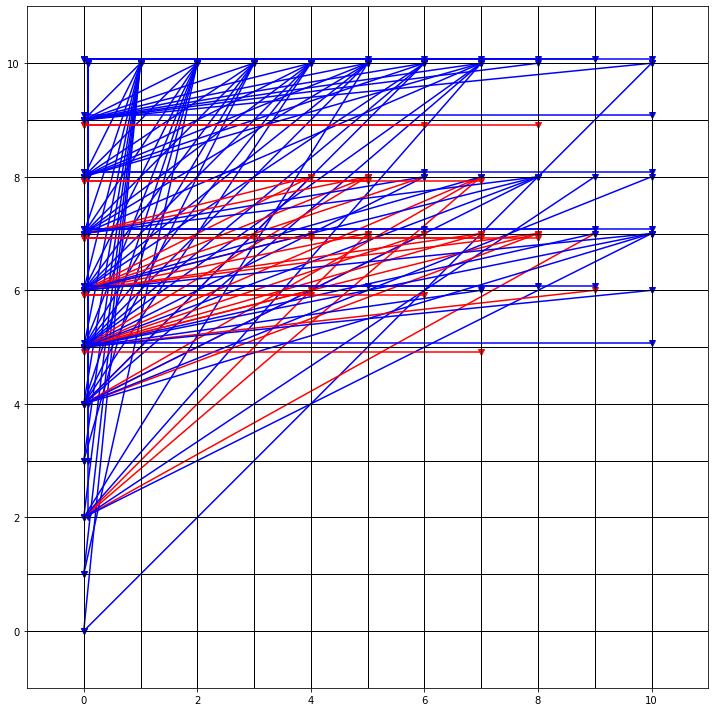

In [12]:
data = np.ones((x_range,y_range)) * np.nan

fig, ax = plt.subplots(1, 1, figsize=(10,10),tight_layout=True)
for x in range(x_range+1):
    ax.axvline(x, lw=1, color='k', zorder=5) # Horizontal 
for y in range(y_range+1):
    ax.axhline(y, lw=1, color='k', zorder=5) # Ordinate
print(m.shape)

for i in range(m.shape[0]):
    for j in range(m.shape[1]):
        for k in range(i,m.shape[0]):
            for l in range(j,m.shape[1]):
                if(m[i,j,k,l]):
                    print("m(({0},{1}),({2},{3}))={4}".format(i,j,k,l,int(m[i,j,k,l])))
                if(m[i,j,k,l]>0):
                    if(i==k and j==l):
                        ax.plot([i, k], [j, l],'bo', linestyle="-")
                    elif(i==k):
                        ax.plot([i+0.08, k+0.08], [j, l],'bv', linestyle="-")
                    elif(j==l):
                        ax.plot([i, k], [j+0.08, l+0.08],'bv',linestyle="-")
                    else:  
                        ax.plot([i, k], [j, l],'bv', linestyle="-")
                if(m[i,j,k,l]<0):
                    if(i==k and j==l):
                        ax.plot([i, k], [j, l],'ro', linestyle="-")
                    elif(i==k):
                        ax.plot([i-0.08, k-0.08], [j, l],'rv', linestyle="-")
                    elif(j==l):
                        ax.plot([i, k], [j-0.08, l-0.08],'rv', linestyle="-")
                    else:  
                        ax.plot([i, k], [j, l], 'rv', linestyle="-")

ax.imshow(data, interpolation='none', extent=[-1,x_range+1, -1, y_range+1], zorder=0)

#ax.axis('off')